# TRAINING THE DEEP LEARNING MODEL

#### we are going to traing our data with our convolutional neural network

#### Step 1 - load the pre-proccess data 

In [1]:
# import libraries
import os # to interact with the file system
import numpy as np 
import cv2  # to read the images and to do image processing 
import gc # to clear our memories


In [2]:
# load the pre-proccessed data from the npz file 
data = np.load('./data/data_preprocess_lite.npz')


In [3]:
# restore the data
x=data['arr_0'] # images
y=data['arr_1'] # labels


##### we need to do a pre-proccessing before we move this data to the neural network
##### we are goin to use One Hot coding format

In [4]:
# here we will do one hot encoding
# we creat martrix of zeros and ones that represent the 4 labels of the data to be used in the training labels
from sklearn.preprocessing import  OneHotEncoder # to do one hot encoding
onehot=OneHotEncoder() # create an object of the class
y_onehot=onehot.fit_transform(y.reshape(-1,1)).toarray() # fit and transform the data
y_array=y_onehot # convert the sparse matrix to an array

#### Split the data into Train and Test sets.

In [5]:
from sklearn.model_selection import train_test_split # to split the data into training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y_array,test_size=0.2,random_state=42) # split the data into training and testing

In [6]:
import tensorflow as tf # to build the model
from tensorflow.python.keras  import layers # to build the layers of the model
from tensorflow.python.keras import Sequential # to build the model


# convolutional neural network
model=Sequential([
    layers.Conv2D(16,3,padding='same',input_shape=(100,100,3),activation='relu'), # layer 1
    layers.MaxPooling2D(), # layer 1 pooling 
    
    layers.Conv2D(32,3,padding='same',activation='relu'), # layer 2
    layers.MaxPooling2D(), # layer 2 pooling
    
    layers.Conv2D(64,3,padding='same',activation='relu'), # layer 3
    layers.MaxPooling2D(), # layer 3 pooling
    
    layers.Flatten(), # flatten the data to the first neural network layer
    layers.Dense(192,activation='relu'), # first neural network layer 192 neurons
    layers.Dense(28,activation='relu'), # second neural network layer 28 neurons
    layers.Dense(4,activation='sigmoid') # output layer 4 neurons
]) # create an object of the class

# compile the cnn model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) # compile the model




In [7]:
model.summary() # print the model summery

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0

In [8]:
# train the model
history = model.fit(x_train,y_train,epochs=10,batch_size=64,validation_data=(x_test,y_test)) # train the model

Epoch 1/10
124/124 [==============================] - 29s 232ms/step - loss: 0.1389 - accuracy: 0.8964 - val_loss: 0.0502 - val_accuracy: 0.9632
Epoch 2/10
124/124 [==============================] - 29s 233ms/step - loss: 0.0382 - accuracy: 0.9764 - val_loss: 0.0322 - val_accuracy: 0.9793
Epoch 3/10
124/124 [==============================] - 44s 356ms/step - loss: 0.0241 - accuracy: 0.9835 - val_loss: 0.0329 - val_accuracy: 0.9778
Epoch 4/10
124/124 [==============================] - 31s 247ms/step - loss: 0.0170 - accuracy: 0.9885 - val_loss: 0.0292 - val_accuracy: 0.9844
Epoch 5/10
124/124 [==============================] - 26s 211ms/step - loss: 0.0131 - accuracy: 0.9905 - val_loss: 0.0255 - val_accuracy: 0.9849
Epoch 6/10
124/124 [==============================] - 48s 385ms/step - loss: 0.0108 - accuracy: 0.9916 - val_loss: 0.0302 - val_accuracy: 0.9788
Epoch 7/10
124/124 [==============================] - 48s 386ms/step - loss: 0.0046 - accuracy: 0.9976 - val_loss: 0.0248 - val_ac

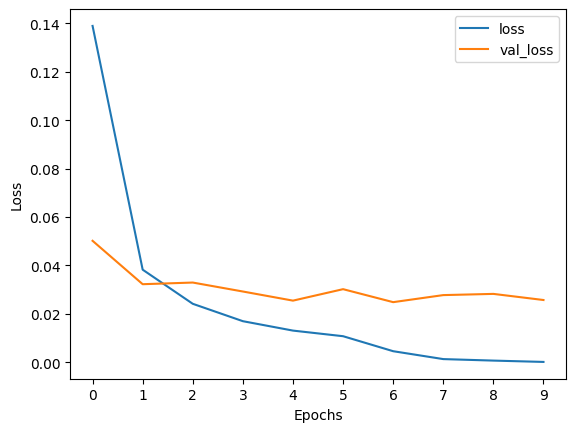

Text(0, 0.5, 'Accuracy')

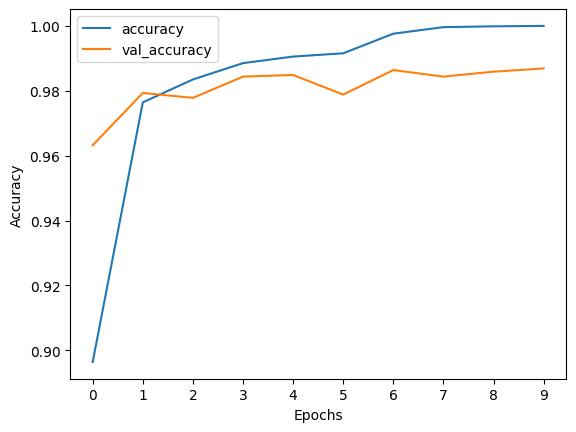

In [9]:
import matplotlib.pyplot as plt # to plot the results
import pandas as pd  # to convert the history object to a dataframe

history_df = pd.DataFrame(history.history) # convert the history object to a dataframe
history_df.loc[:, ['loss', 'val_loss']].plot() # plot the loss and the validation loss

plt.xlabel('Epochs') # label the x axis
plt.ylabel('Loss') # label the y axis
plt.xticks(np.arange(0, 10, 1)) # set the x ticks
plt.show() # show the plot

history_df.loc[:, ['accuracy', 'val_accuracy']].plot() # plot the accuracy and the validation accuracy
plt.xlabel('Epochs') # label the x axis
plt.xticks(np.arange(0, 10, 1)) # set the x ticks
plt.ylabel('Accuracy') # label the y axis





In [23]:
# save the model
model.save('./data/model.h5') # save the model